In [2]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sympy as sy
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D

import math
from math import exp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


# Homework 3

## Question 1. Computing Transitions in a Representative Agent Economy

## a)

### $\mathcal{L} = E_0 \{ \sum_{j=0}^{\infty} \beta ^t \ln c_t - \sum_{j=0}^{\infty} \lambda _t [ c_t + k_{t+1} - k_t^{1-\theta} (h z)^\theta - (1 - \delta)k_t] \} $

### FOCs:
### $ \frac{\partial \mathcal{L}}{\partial c_t} = \frac{\beta ^t}{c_t} - \lambda _t = 0$
### $ \frac{\partial \mathcal{L}}{\partial k_{t+1}} = -\lambda _t + \lambda _{t+1} [( z h )^\theta (1-\theta) k_{t+1} ^{-\theta} + (1-\delta)] = 0$
### solving FOCs
###  $\frac{\beta _t}{c_t} = \frac{\beta _{t+1}}{c_{t+1}} [( z h )^\theta (1-\theta) k_t ^{-\theta} + (1-\delta)]$
###  $\frac{c_{t+1}}{c_t} = \beta [( z h )^\theta (1-\theta) k_{t+1} ^{-\theta} + (1-\delta)]$
### in the Steady State
### $ 1 = \beta [( z h )^\theta (1-\theta) k ^{-\theta} + (1-\delta)]$
### thus
### $ k = (\frac {\beta^{-1} - (1-\delta)} {(z h)^\theta (1 - \theta)} )^{\frac{-1}{\theta}} $
### also in the Steady State $i = \delta  k$ So if $\frac{k}{Y} = 4 \; \& \; \frac{i}{Y} = 0.25$ then $\delta = \frac{1}{16}$
### and
### $ 1 = \beta [ (1-\theta) \frac{Y}{k} + (1-\delta)]$ 
### knowing that $\frac{k}{Y}= 4$
### $\beta = \frac{1}{ \frac{1-\theta}{4} + (1 - \delta)} $ which is about 0.98
### in addition: $ c + i = y $ so $ \frac{c}{Y} + \frac{i}{Y} = 1$ and $\frac{c}{Y} = 1 - 0.25$ , $c = 0.75Y $ so $ i = 0.25Y$
### After normalizing the output such that $Y=1$ one can obtain $c=0.75$ and $i=0.25$ . Moreover $1 = (z h )^\theta 4^{1-\theta}$ so $z=4^{\frac{\theta-1}{\theta}} h^{-1}$

In [44]:
h = 0.31
theta = 0.67
delta = 1/16
beta = 1/((1-theta)/4+(1-delta))

z = 4**((theta-1)/theta)/h
k_SS = 4.0
Y_SS = 1.0
#Y_SS = k_SS**(1-theta)*(z*h)**theta
c_SS = 0.75*Y_SS
i_SS = 0.25*Y_SS

print('In the steadY_SS state:')
print('z = ', round(z,2))
print('k = ',k_SS)
print('h = ',h)
print('Y = ',Y_SS)
print('c = ', c_SS)
print('i = ', i_SS)
print('beta = ',beta)
print('delta =', delta)
print('theta =', theta)

In the steadY_SS state:
z =  1.63
k =  4.0
h =  0.31
Y =  1.0
c =  0.75
i =  0.25
beta =  0.9803921568627451
delta = 0.0625
theta = 0.67


## b)

In [45]:
z_new = z*2
k_new = ((beta**(-1)-1+delta)/((z_new*h)**(theta)*(1-theta)))**(-1/theta)
Y_new = k_new**(1-theta)*(z_new*h)**theta
c_new = 0.75*Y_new
i_new = 0.25*Y_new

print('In the NEW steady state:')
print('z = ', round(z_new,2))
print('k = ',round(k_new,2))
print('h = ',round(h,2))
print('Y = ',round(Y_new,2))
print('c = ', round(c_new,2))
print('i = ', round(i_new,2))

In the NEW steady state:
z =  3.26
k =  8.0
h =  0.31
Y =  2.0
c =  1.5
i =  0.5


## c)

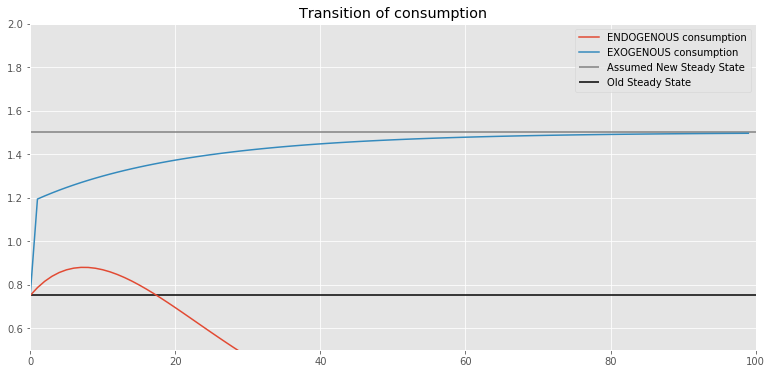

In [46]:
k_endo= np.zeros(100)
k_exo= np.zeros(100)
Y_endo= np.zeros(100)
Y_exo= np.zeros(100)
c_endo= np.zeros(100)
c_exo= np.zeros(100)
i_endo= np.zeros(100)
i_exo= np.zeros(100)



k_endo[0] = k_SS
k_exo[0] = k_SS
Y_endo[0] = Y_SS
Y_exo[0] = Y_SS
c_endo[0] = c_SS
c_exo[0] = c_SS
i_endo[0] = i_SS
i_exo[0] = i_SS


for t in range(99):
    k_endo[t+1] = Y_endo[t]-c_endo[t]+(1-delta)*k_endo[t]
    k_exo[t+1] = Y_exo[t]-c_exo[t]+(1-delta)*k_exo[t]
    Y_endo[t+1] = k_endo[t+1]**(1-theta)*(z_new*h)**theta
    Y_exo[t+1] = k_exo[t+1]**(1-theta)*(z_new*h)**theta
    c_endo[t+1] = c_endo[t]*beta*((1-theta)*Y_endo[t+1]/k_endo[t+1] + 1 - delta) #Euler equation
    c_exo[t+1] = 0.75*Y_exo[t+1]
    i_endo[t+1] = Y_endo[t+1]-c_endo[t+1]
    i_exo[t+1] = 0.25*Y_exo[t+1]
    
#print('Period: ', 99, 'k= ', k[99], 'Y= ', Y[99], 'c= ', c[99], 'i= ', i[99])   

def plot():
    t = range(100)
    plt.plot(t,c_endo,label='ENDOGENOUS consumption')
    plt.plot(t,c_exo,label='EXOGENOUS consumption')
    plt.xlim([0,100])
    plt.ylim([0.5,2])
    plt.grid(True)
    plt.title('Transition of consumption')
    plt.rcParams["figure.figsize"] = (12,8)
    plt.hlines(c_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(c_SS, 0, 100, colors='black',label='Old Steady State')
    plt.legend()
    plt.show()
    
plot()


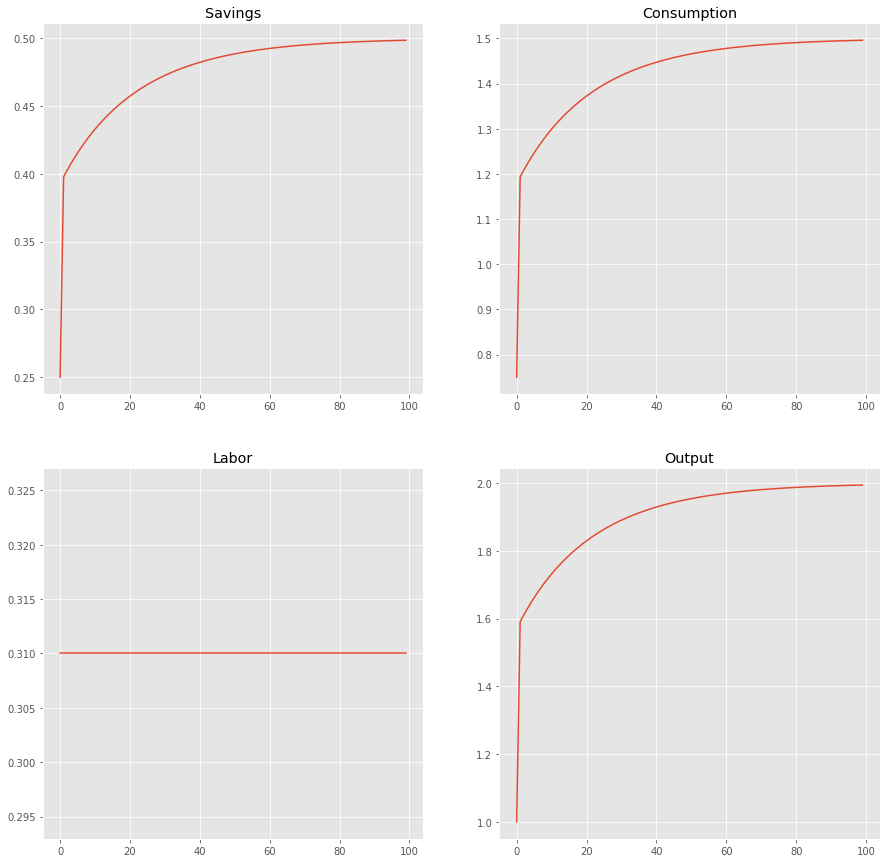

In [47]:
def plotC():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    savings = fig.add_subplot(2, 2, 1)
    consumption = fig.add_subplot(2, 2, 2)
    labor= fig.add_subplot(2, 2, 3)
    output= fig.add_subplot(2, 2, 4)

    savings.plot(range(100), i_exo)
    savings.set_title('Savings')
    
    consumption.plot(range(100), c_exo)
    consumption.set_title('Consumption')
    
    labor.plot(range(100), np.ones(100)*h)
    labor.set_title('Labor')
    
    output.plot(range(100), Y_exo)
    output.set_title('Output')
    
    

plotC()

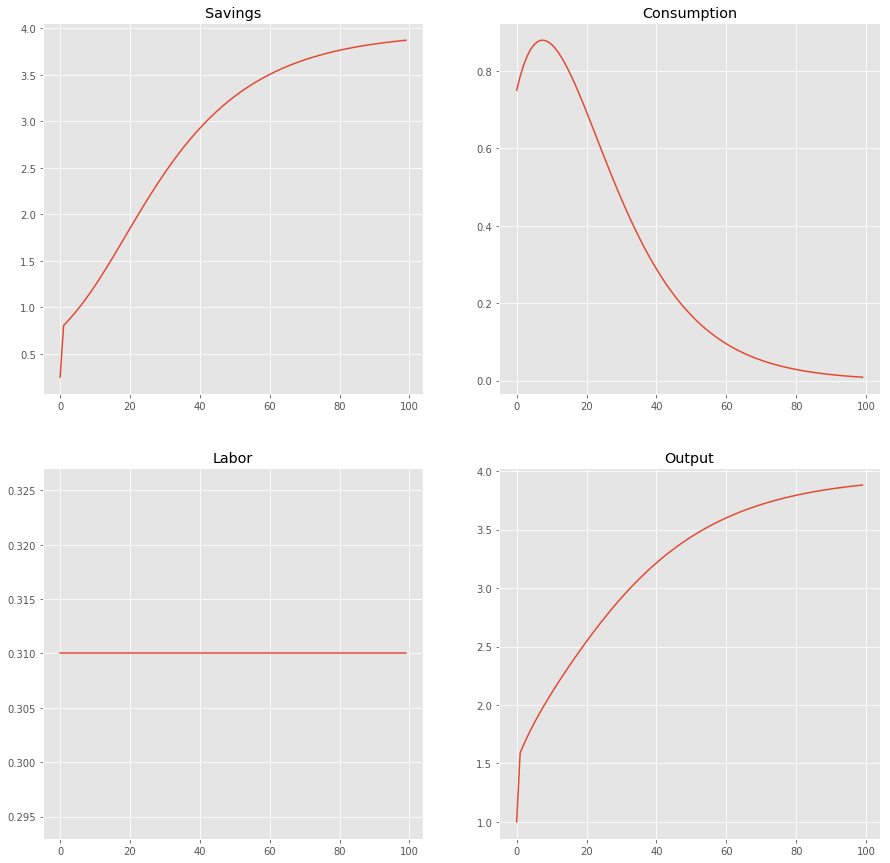

In [48]:
def plotC():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    savings = fig.add_subplot(2, 2, 1)
    consumption = fig.add_subplot(2, 2, 2)
    labor= fig.add_subplot(2, 2, 3)
    output= fig.add_subplot(2, 2, 4)

    savings.plot(range(100), i_endo)
    savings.set_title('Savings')
    
    consumption.plot(range(100), c_endo)
    consumption.set_title('Consumption')
    
    labor.plot(range(100), np.ones(100)*h)
    labor.set_title('Labor')
    
    output.plot(range(100), Y_endo)
    output.set_title('Output')
    
    

plotC()

## d)

Period:  0 k =  4.0 Y =  1.0 c =  0.75 i=  0.25
Period:  1 k =  4.0 Y =  1.59 c =  1.19 i=  0.4
Period:  2 k =  4.15 Y =  1.61 c =  1.21 i=  0.4
Period:  3 k =  4.29 Y =  1.63 c =  1.22 i=  0.41
Period:  4 k =  4.43 Y =  1.65 c =  1.23 i=  0.41
Period:  5 k =  4.56 Y =  1.66 c =  1.25 i=  0.42
Period:  6 k =  4.69 Y =  1.68 c =  1.26 i=  0.42
Period:  7 k =  4.82 Y =  1.69 c =  1.27 i=  0.42
Period:  8 k =  4.94 Y =  1.71 c =  1.28 i=  0.43
Period:  9 k =  5.06 Y =  1.72 c =  1.29 i=  0.43
Period:  10 k =  5.17 Y =  1.73 c =  1.3 i=  0.43
Period:  11 k =  5.28 Y =  1.1 c =  0.82 i=  0.27
Period:  12 k =  5.23 Y =  1.09 c =  0.82 i=  0.27
Period:  13 k =  5.17 Y =  1.09 c =  0.82 i=  0.27
Period:  14 k =  5.12 Y =  1.09 c =  0.81 i=  0.27
Period:  15 k =  5.07 Y =  1.08 c =  0.81 i=  0.27
Period:  16 k =  5.03 Y =  1.08 c =  0.81 i=  0.27
Period:  17 k =  4.98 Y =  1.08 c =  0.81 i=  0.27
Period:  18 k =  4.94 Y =  1.07 c =  0.8 i=  0.27
Period:  19 k =  4.9 Y =  1.07 c =  0.8 i=  0.27


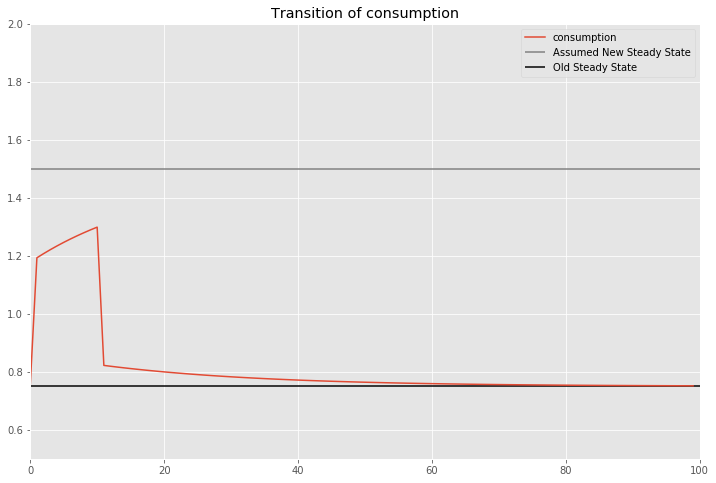

In [115]:
k= np.zeros(100)
Y= np.zeros(100)
c= np.zeros(100)
i= np.zeros(100)

k[0] = k_SS
Y[0] = Y_SS
c[0] = c_SS
i[0] = i_SS

#positive shock happens
for t in range(10):
    #print('Period: ', t, 'k = ', round(k[t],2), 'Y = ', round(Y[t],2), 'c = ', round(c[t],2), 'i= ', round(i[t],2))
    k[t+1] = Y[t]-c[t]+(1-delta)*k[t]
    Y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    c[t+1] = Y[t+1] * 0.75
    i[t+1] = Y[t+1] * 0.25

#negative shock happens
for t in range(10,99):
    #print('Period: ', round(t,2), 'k = ', round(k[t],2), 'Y = ', round(Y[t],2), 'c = ', round(c[t],2), 'i= ', round(i[t],2))
    k[t+1] = Y[t]-c[t]+(1-delta)*k[t]
    Y[t+1] = k[t+1]**(1-theta)*(z*h)**theta
    c[t+1] = Y[t+1] * 0.75
    i[t+1] = Y[t+1] * 0.25
    

def plot():
    t = range(100)
    plt.plot(t,c,label='consumption')
    plt.xlim([0,100])
    plt.ylim([0.5,2])
    plt.grid(True)
    plt.title('Transition of consumption')
    plt.rcParams["figure.figsize"] = (12,8)
    plt.hlines(c_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(c_SS, 0, 100, colors='black',label='Old Steady State')
    plt.legend()
    plt.show()
    
plot()


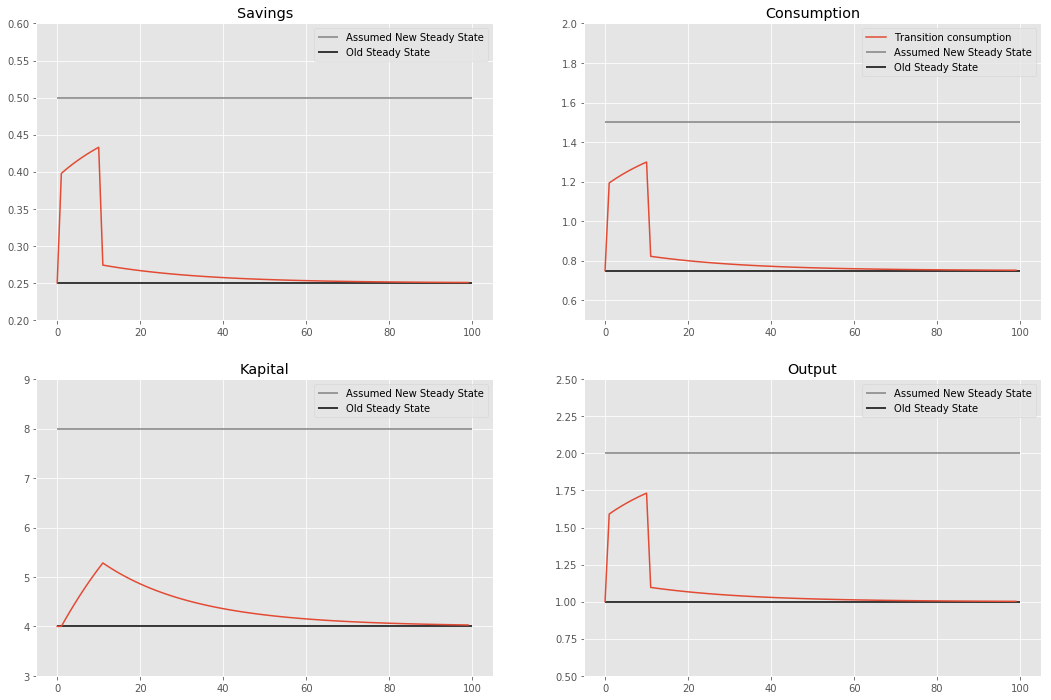

In [73]:
def plotC():
    fig = plt.figure(figsize=(18, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    savings = fig.add_subplot(2, 2, 1)
    savings.plot(range(100), i)
    savings.set_title('Savings')
    plt.ylim([0.2,0.6])
    plt.hlines(i_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(i_SS, 0, 100, colors='black',label='Old Steady State') 
    plt.legend()
    
    consumption = fig.add_subplot(2, 2, 2)
    consumption.plot(range(100), c, label='Transition consumption')
    consumption.set_title('Consumption')
    plt.ylim([0.5,2])
    plt.hlines(c_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(c_SS, 0, 100, colors='black',label='Old Steady State') 
    plt.legend()
    
    labor= fig.add_subplot(2, 2, 3)
    labor.plot(range(100), k)
    labor.set_title('Kapital')
    plt.ylim([3,9])
    plt.hlines(k_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(k_SS, 0, 100, colors='black',label='Old Steady State') 
    plt.legend()
    
    
    output= fig.add_subplot(2, 2, 4)
    output.plot(range(100), Y)
    output.set_title('Output')
    plt.ylim([0.5,2.5])
    plt.hlines(Y_new, 0, 100, colors='gray', label='Assumed New Steady State')
    plt.hlines(Y_SS, 0, 100, colors='black',label='Old Steady State') 
    plt.legend()

plotC()

## e) consumption taxes = 20%

In [29]:
tc = 0.2
h = 0.31
theta = 0.67
delta = 1/16
beta = 1/((1-theta)/4+(1-delta))

z = 4**((theta-1)/theta)/h
k_SS = 4.0
Y_SS = 1.0
c_SS = 0.75*Y_SS*(1-tc)
i_SS = 0.25*Y_SS

print('In the steady state:')
print('z = ', round(z,2))
print('k = ',k_SS)
print('h = ',h)
print('Y = ',Y_SS)
print('c = ', c_SS)
print('i = ', i_SS)

In the steady state:
z =  1.63
k =  4.0
h =  0.31
Y =  1.0
c =  0.6000000000000001
i =  0.25


In [30]:
z_new = z*2
k_new = ((beta**(-1)-1+delta)/((z_new*h)**(theta)*(1-theta)))**(-1/theta)
Y_new = k_new**(1-theta)*(z_new*h)**theta
c_new = 0.75*Y_new*(1-tc)
i_new = 0.25*Y_new

print('In the NEW steady state:')
print('z = ', round(z_new,2))
print('k = ',round(k_new,2))
print('h = ',round(h,2))
print('Y = ',round(Y_new,2))
print('c = ', round(c_new,2))
print('i = ', round(i_new,2))

In the NEW steady state:
z =  3.26
k =  8.0
h =  0.31
Y =  2.0
c =  1.2
i =  0.5


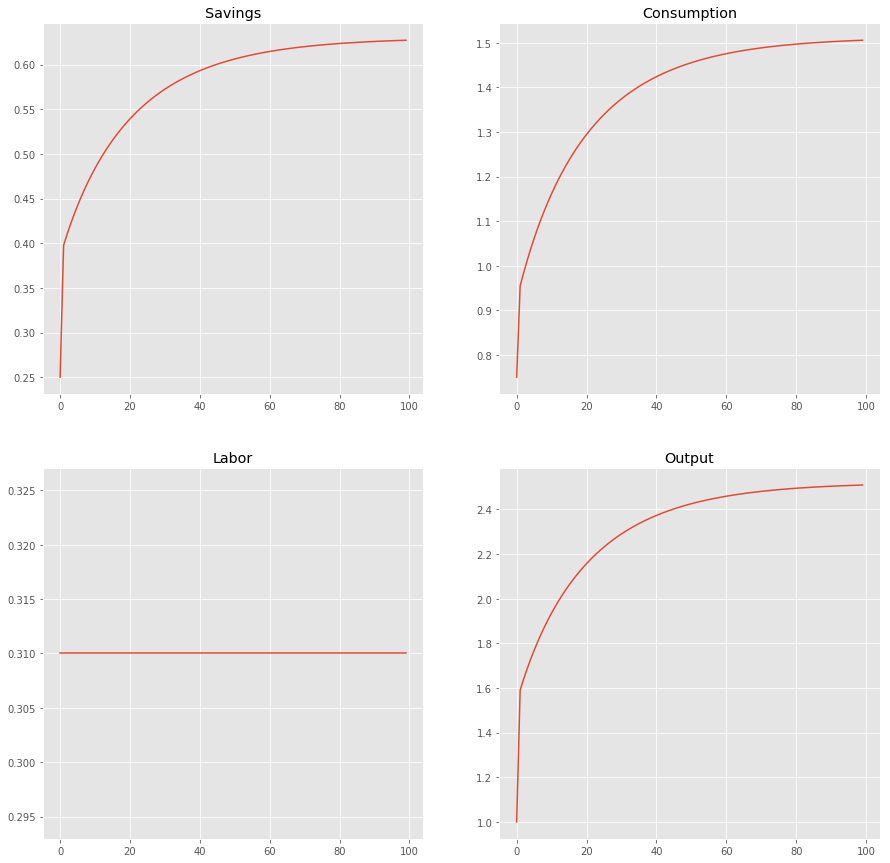

In [61]:
k= np.zeros(100)
Y= np.zeros(100)
c= np.zeros(100)
i= np.zeros(100)

k[0] = k_SS
Y[0] = Y_SS
c[0] = c_SS
i[0] = i_SS

for t in range(99):
    k[t+1] = Y[t]-c[t]+(1-delta)*k[t]
    Y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    c[t+1] = 0.75*Y[t+1]*(1-tc)
    i[t+1] = 0.25*Y[t+1]
    
def plotC():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    savings = fig.add_subplot(2, 2, 1)
    consumption = fig.add_subplot(2, 2, 2)
    labor= fig.add_subplot(2, 2, 3)
    output= fig.add_subplot(2, 2, 4)

    savings.plot(range(100), i)
    savings.set_title('Savings')
    
    consumption.plot(range(100), c)
    consumption.set_title('Consumption')
    
    labor.plot(range(100), np.ones(100)*h)
    labor.set_title('Labor')
    
    output.plot(range(100), Y)
    output.set_title('Output')
    
plotC()
    

## Consumption tax does not impact on the spead of convergence

## e) Capital tax = 5%

In [56]:
tk = 0.0
h = 0.31
theta = 0.67
delta = 1/16
beta = 1/((1-theta)/4+(1-delta))
tax = 0

z = 4**((theta-1)/theta)/h
k_SS = 4.0
Y_SS = 1.0
c_SS = Y_SS - i_SS - tax
i_SS = 0.25*Y_SS
tax = tk * k_SS
tax_SS = tax

print('In the steady state:')
print('z = ', round(z,2))
print('k = ',k_SS)
print('h = ',h)
print('Y = ',Y_SS)
print('c = ', c_SS)
print('i = ', i_SS)
print('Capital tax = ', tax)

In the steady state:
z =  1.63
k =  4.0
h =  0.31
Y =  1.0
c =  0.75
i =  0.25
Capital tax =  0.0


In [57]:
tax_new = 0

z_new = z*2
k_new = ((beta**(-1)-1+delta)/((z_new*h)**(theta)*(1-theta)))**(-1/theta)
Y_new = k_new**(1-theta)*(z_new*h)**theta
c_new = Y_new - i_new - tax_new
i_new = 0.25*Y_new
tax_new = tk*k_new

print('In the NEW steady state:')
print('z = ', round(z_new,2))
print('k = ',round(k_new,2))
print('h = ',round(h,2))
print('Y = ',round(Y_new,2))
print('c = ', round(c_new,2))
print('i = ', round(i_new,2))
print('Capital tax = ', round(tax_new,2))

In the NEW steady state:
z =  3.26
k =  8.0
h =  0.31
Y =  2.0
c =  1.5
i =  0.5
Capital tax =  0.0


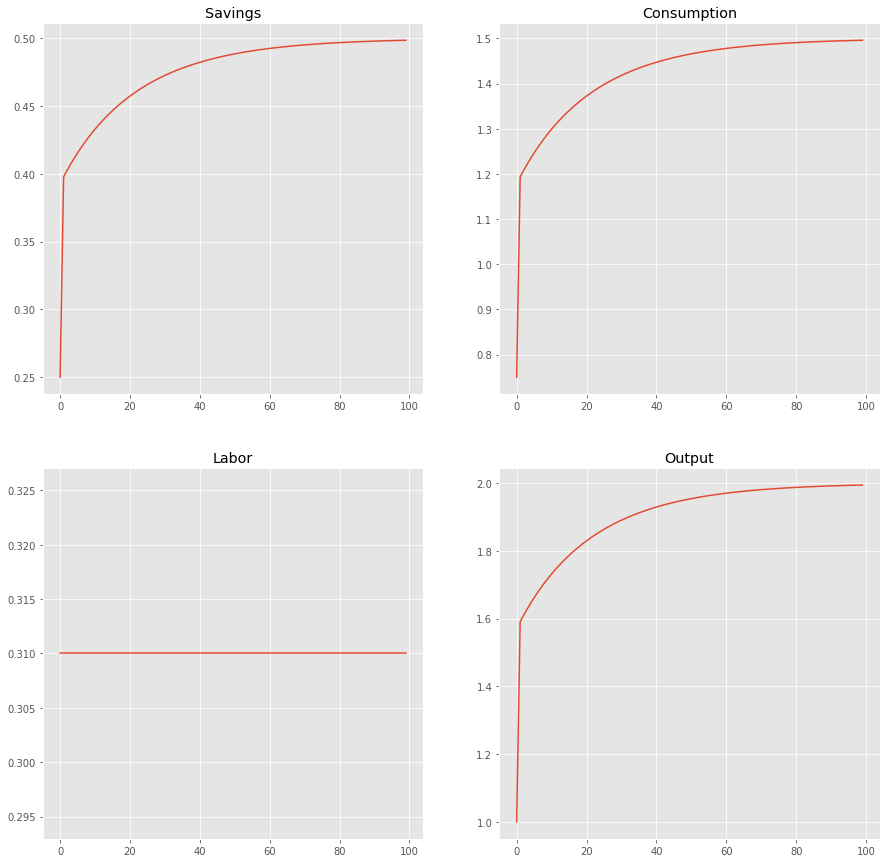

In [67]:
k= np.zeros(100)
Y= np.zeros(100)
c= np.zeros(100)
i= np.zeros(100)
tax = np.zeros(100)

tax[0] = tax_SS
k[0] = k_SS
Y[0] = Y_SS
c[0] = c_SS
i[0] = i_SS

for t in range(99):
    k[t+1] = Y[t]-c[t]+(1-delta)*k[t]
    Y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    i[t+1] = 0.25*Y[t+1]
    tax[t+1] = k[t+1]*tk
    c[t+1] = Y[t+1] - i[t+1] - tax[t+1]
    
def plotC():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    savings = fig.add_subplot(2, 2, 1)
    consumption = fig.add_subplot(2, 2, 2)
    labor= fig.add_subplot(2, 2, 3)
    output= fig.add_subplot(2, 2, 4)

    savings.plot(range(100), i)
    savings.set_title('Savings')
    
    consumption.plot(range(100), c)
    consumption.set_title('Consumption')
    
    labor.plot(range(100), np.ones(100)*h)
    labor.set_title('Labor')
    
    output.plot(range(100), Y)
    output.set_title('Output')
    
plotC()
    

## Tax on capital does not impact on the spreed of convergence as well

# Question 2.  General Equilibrium with Labor Supply, Uncertainty, and Progressive Labor Income Tax

## a)

### Firstly, I eliminate these two constraint:
### 1. $c + a = (1-t)wh + y_0 + T_1$
### 2. $c' = (1-t)w'h' + (1+r)a + T_2$ 
### plugging 1. into 2.
### $c' = (1-t)w'h' + (1+r)((1-t)wh +y_0 + T_1 - c) + T_2$
### and using expected value: $E_0\{c'\} = (1-t)wE_0\{h'\} + (1+r)((1-t)wh +y_0 + T_1 - c) + T_2$
### Then I include the constraint in the max problem:
## $\max_{\{c, h, h'\}} \frac{c^{1-\sigma}}{1-\sigma} - \kappa \frac{h^{1+\frac{1}{v}}}{1+\frac{1}{v}} + \beta E_0{\{\frac{[{(1-t)w'h' + (1+r)((1-t)wh +y_0 + T_1 - c) + T_2]}^{1-\sigma}}{1-\sigma} - \kappa \frac{h'^{1+\frac{1}{v}}}{1+\frac{1}{v}}\}}$
### subject to: $(1-t)wh + y_0 + T_1 - c \geqslant - \frac{1}{1+r}(y_1-\epsilon_t )$ ??? Perhaps $ (1-t)wh + y_0 + T_1 - c \geqslant - \frac{1}{1+r}wh$
### this is CRRA utility function and I know that $E_0 \{\epsilon_y \} = 0$ so $E_0 \{w' \} = w$ and I ignore expected value sign 
### FOCs:
### $\frac {\partial U}{\partial c} = - c^{-\sigma} - \beta [(1-t)wh' + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma} = 0 $
### $\frac {\partial U}{\partial h} = - \kappa h^{1/v} + \beta [(1-t)wE_0 \{h'\} + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma}(1+r)(1-t)w = 0 $
### $\frac {\partial U}{\partial h'} = -\beta \kappa E_0 \{h'\}^{1/v} + \beta [(1-t)wE_0 \{h'\} + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma}(1-t)w = 0 $
### Therefore $ E_0 \{h'\} = h[\beta (1+r)]^{-v} $
### and $ c= (\frac{\kappa}{w})^{\frac{-1}{\sigma}}h^{\frac{-1}{v\sigma}}$
### Then I construct function which will maximize the utility using Brutal Force approach

In [5]:
def uMax(eta, y, epsilon, t, T1, T2, r):
    w = eta
    w2 = eta + epsilon
    beta = 0.99
    epsilon = 0
    sigma = 3.0
    kappa = 4.0
    v = 4.0
    beta = 0.99
    n = 100   
    u = [-100.0] * n   
    j_max = 0
    u_max = -100000   
    upp = 3
    low = 0.00001   
    c = np.zeros(n)
    h = np.linspace(low,upp,n)
    h_max = 0
    c_max = 0
    Ec2_max = 0
    Eh2_max = 0   
    Ec2 = np.zeros(n)
    Eh2 = np.zeros(n)
    
    #First numerical approximation
    for j in range(n):
        c[j] = (kappa/w)**(-1/sigma)*h[j]**(-1/(v*sigma))
        Eh2[j] = h[j]*(beta*(1+r))**(-v)
        #natural borrowing constraint. w-0.5 is the worst realization of epsilon, Eh2, expected labor in the next period
        if (1-t)*w*h[j]+y+T1-c[j]>=(-1)/(1+r)*((w-0.5)*Eh2[j]): 
            Ec2[j] = (1-t)*w*Eh2[j]+(1+r)*((1-t)*w*h[j]-c[j]+y +T1)+T2
            u[j] = (c[j]**(1-sigma)/(1-sigma)) - kappa*(h[j]**(1+1/v))/(1+1/v) + beta*((Ec2[j]**(1-sigma)/(1-sigma)) - kappa*(Eh2[j]**(1+1/v))/(1+1/v))
            if u[j]>u_max:
                u_max = u[j]
                u1_max = (c[j]**(1-sigma)/(1-sigma)) - kappa*(h[j]**(1+1/v))/(1+1/v)
                Eu2_max = beta*((Ec2[j]**(1-sigma)/(1-sigma)) - kappa*(Eh2[j]**(1+1/v))/(1+1/v))
                j_max = j
                h_max = h[j]
                c_max = c[j]
                Ec2_max = Ec2[j]
                Eh2_max = Eh2[j]
        else:
            u[j]=None

    
    #in the second period the agent knows his Epsilon and new wage which means that he can reoptimize
    #the consumption and labor
    h2 = np.linspace(Eh2[j_max]*0.1, Eh2[j_max]*10, n)
    c2 = np.zeros(n)
    c2_max = 0
    h2_max = 0
    u2_max = -10000
    jj_max = 0
    u2 = [-1000.0] * n
    for jj in range(n):
        c2[jj] = (1-t)*w2*h2[jj] + (1+r)*((1-t)*w*h_max+y+T1-c_max) + T2
        u2[jj] = c2[jj]**(1-sigma)/(1-sigma) - kappa*h2[jj]**(1+1/v)/(1+1/v)
        if u2[jj]>u2_max:
            u2_max = u2[jj]
            jj_max =jj
            c2_max = c2[jj]
            h2_max = h2[jj]            
    
    
    u_LT = u1_max + beta*u2_max 
    taxRevenue1 = t*w*h_max
    taxRevenue2 = t*w2*h2_max
    ass = (1-t)*w*h_max+y+T1-c_max
    saveRate = ass/(y+(1-t)*w*h_max)
    
    A_d = min(0, (1-t)*w*h_max+y+T1-c_max)
    A_s = max(0, (1-t)*w*h_max+y+T1-c_max)

    
    return(u_max, Eu2_max, c_max, h_max, Ec2_max, Eh2_max, c2_max, h2_max, Eu2_max, 
           u2_max, u1_max, u_LT, taxRevenue1, taxRevenue2, ass, saveRate,
           A_d, A_s
          )

# 0. u_max
# 1. Eu2_max
# 2. c_max
# 3. h_max
# 4. Ec2_max
# 5. Eh2_max
# 6. c2_max
# 7. h2_max
# 8. Eu2_max
# 9. u2_max
# 10. u1_max
# 11. u_LT
# 12. taxRevenue1
# 13. taxRevenue2
# 14. ass
# 15. saveRate
# 16. Aggregate demand on kapital
# 17. Aggregate supply of kapital

In [13]:
uMax(2.5, 0.001, -0.5, 0, 0, 0, 0.005)

(-3.000058459600246,
 -1.5185454441818844,
 0.9301868357962868,
 0.3636451515151515,
 0.9075368411704431,
 0.37108446718555727,
 0.8704283944518874,
 0.44530136062266873,
 -1.5185454441818844,
 -1.8239781001745548,
 -1.4815130154183618,
 -3.287251334591171,
 0.0,
 -0.020073957008408083,
 -0.022056557462568058)

In [14]:
uMax(2.5, 0.009, -0.5, 0, 0, 0, 0.005)

(-2.9895495689771443,
 -1.5080365535587825,
 0.9301868357962868,
 0.3636451515151515,
 0.915576841170443,
 0.37108446718555727,
 0.8784683944518873,
 0.44530136062266873,
 -1.5080365535587825,
 -1.8119534665814467,
 -1.4815130154183618,
 -3.2753469473339942,
 0.0,
 -0.012073957008408076,
 -0.013150841565743518)

## Define population

In [3]:
P= [0.0] * 400
for i in range(400):
    P[i] = [0] * 3

#eta
#y
#epsilon

#define wealth
wealth = np.linspace(0.001, 0.009, 100)
#remove the middle class
for i in range(100):
    if wealth[i] >= 0.0055 and wealth[i] <= 0.0087:
        wealth[i] = 0.001

for i in range(100):
    P[i][0] = 1
    P[i][1] = wealth[i]
    P[i][2] = (-1)**i*0.5
for i in range(100,200):
    P[i][0] = 1.5
    P[i][1] = wealth[i-100]
    P[i][2] = (-1)**(i+1)*0.5
for i in range(200,300):
    P[i][0] = 2.5
    P[i][1] = wealth[i-200]
    P[i][2] = (-1)**i*0.5
for i in range(300,400):
    P[i][0] = 3
    P[i][1] = wealth[i-300]
    P[i][2] = (-1)**(i+1)*0.5

## Figure 1 (optimal assets and consumption as a function of initial wealth)

In [16]:
y = [0]*400
assets = [0]*400
consum1 = [0]*400
consum2 = [0]*400
#LT= [0]*400

for i in range(400):
    y[i] = P[i][1]
    assets[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[13]
    consum1[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[2]
    consum2[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[6]
    #LT[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.05)[11]

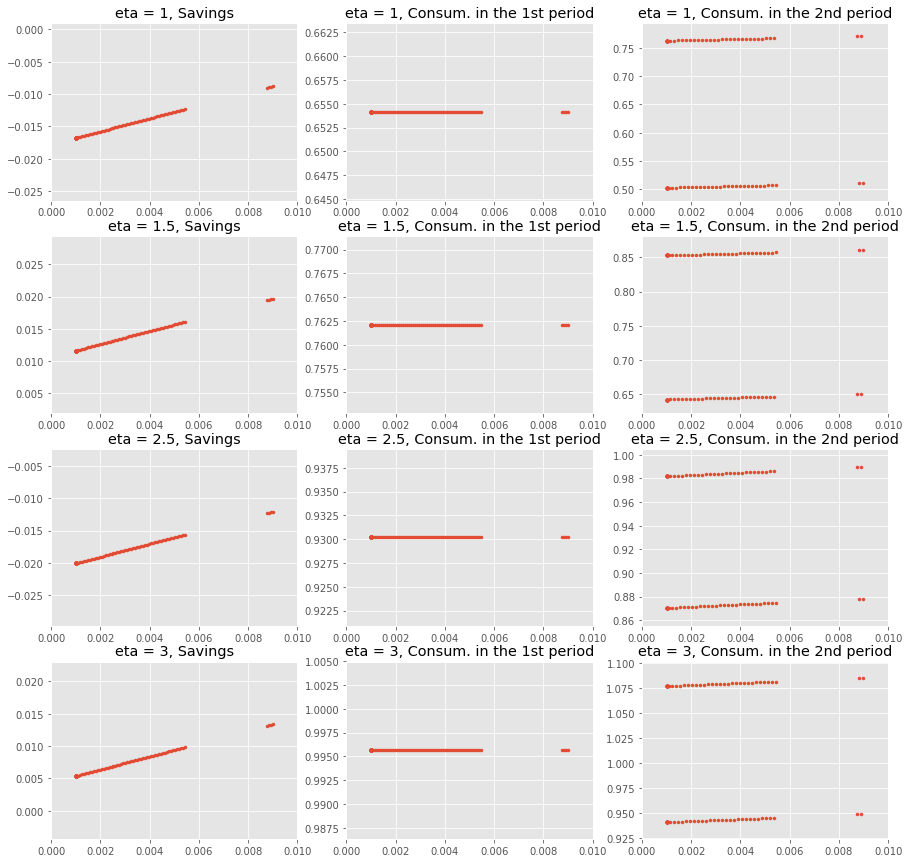

In [17]:
def plot2AFig1():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1ass = fig.add_subplot(4, 3, 1)
    eta1ass.scatter(y[0:100], assets[0:100], marker='.')
    eta1ass.set_title('eta = 1, Savings')
    plt.xlim([0,0.01])
    eta1cons1 = fig.add_subplot(4, 3, 2)
    eta1cons1.scatter(y[0:100],consum1[0:100], marker='.')
    eta1cons1.set_title('eta = 1, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(4, 3, 3)
    eta1cons2.scatter(y[0:100], consum2[0:100], marker='.')
    eta1cons2.set_title('eta = 1, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta15ass = fig.add_subplot(4, 3, 4)
    eta15ass.scatter(y[100:200], assets[100:200], marker='.')
    eta15ass.set_title('eta = 1.5, Savings')
    plt.xlim([0,0.01])
    eta15cons1 = fig.add_subplot(4, 3, 5)
    eta15cons1.scatter(y[100:200],consum1[100:200], marker='.')
    eta15cons1.set_title('eta = 1.5, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta15cons2= fig.add_subplot(4, 3, 6)
    eta15cons2.scatter(y[100:200], consum2[100:200], marker='.')
    eta15cons2.set_title('eta = 1.5, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta25ass = fig.add_subplot(4, 3, 7)
    eta25ass.scatter(y[200:300], assets[200:300], marker='.')
    eta25ass.set_title('eta = 2.5, Savings')
    plt.xlim([0,0.01])
    eta25cons1 = fig.add_subplot(4, 3, 8)
    eta25cons1.scatter(y[200:300],consum1[200:300], marker='.')
    eta25cons1.set_title('eta = 2.5, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta25cons2= fig.add_subplot(4, 3, 9)
    eta25cons2.scatter(y[200:300], consum2[200:300], marker='.')
    eta25cons2.set_title('eta = 2.5, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta3ass = fig.add_subplot(4, 3, 10)
    eta3ass.scatter(y[300:400], assets[300:400], marker='.')
    eta3ass.set_title('eta = 3, Savings')
    plt.xlim([0,0.01])
    eta3cons1 = fig.add_subplot(4, 3, 11)
    eta3cons1.scatter(y[300:400],consum1[300:400], marker='.')
    eta3cons1.set_title('eta = 3, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta3cons2= fig.add_subplot(4, 3, 12)
    eta3cons2.scatter(y[300:400], consum2[300:400], marker='.')
    eta3cons2.set_title('eta = 3, Consum. in the 2nd period')
    plt.xlim([0,0.01])

plot2AFig1()

## Figure 2

In [24]:
y = [0]*400
saveRate = [0]*400

for i in range(400):
    y[i] = P[i][1]
    saveRate[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[15]
    
minSave = min(saveRate) - 0.01
maxSave = max(saveRate) + 0.01

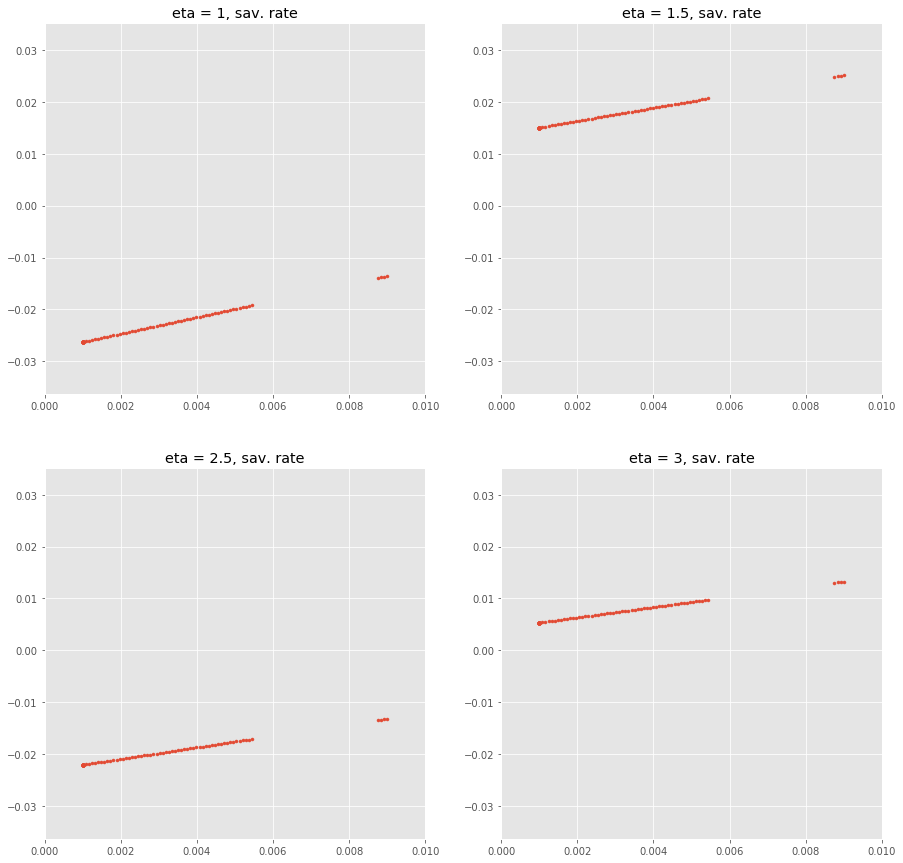

In [25]:
def plot2AFig2():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1 = fig.add_subplot(2, 2, 1)
    eta1.scatter(y[0:100], saveRate[0:100], marker='.')
    eta1.set_title('eta = 1, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([minSave, maxSave])
    eta15 = fig.add_subplot(2, 2, 2)
    eta15.scatter(y[100:200],saveRate[100:200], marker='.')
    eta15.set_title('eta = 1.5, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([minSave, maxSave])
    eta25= fig.add_subplot(2, 2, 3)
    eta25.scatter(y[200:300], saveRate[200:300], marker='.')
    eta25.set_title('eta = 2.5, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([minSave, maxSave])
    eta3= fig.add_subplot(2, 2, 4)
    eta3.scatter(y[300:400], saveRate[300:400], marker='.')
    eta3.set_title('eta = 3, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([minSave, maxSave])
    
plot2AFig2()

## Figure 3

In [20]:
y = [0]*400
optiH1 = [0]*400
optiH2 = [0]*400

for i in range(400):
    y[i] = P[i][1]
    optiH1[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[3]
    optiH2[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[7]
    
minH = min(min(optiH1),min(optiH2)) - 0.01
maxH = max(max(optiH1), max(optiH2)) + 0.01

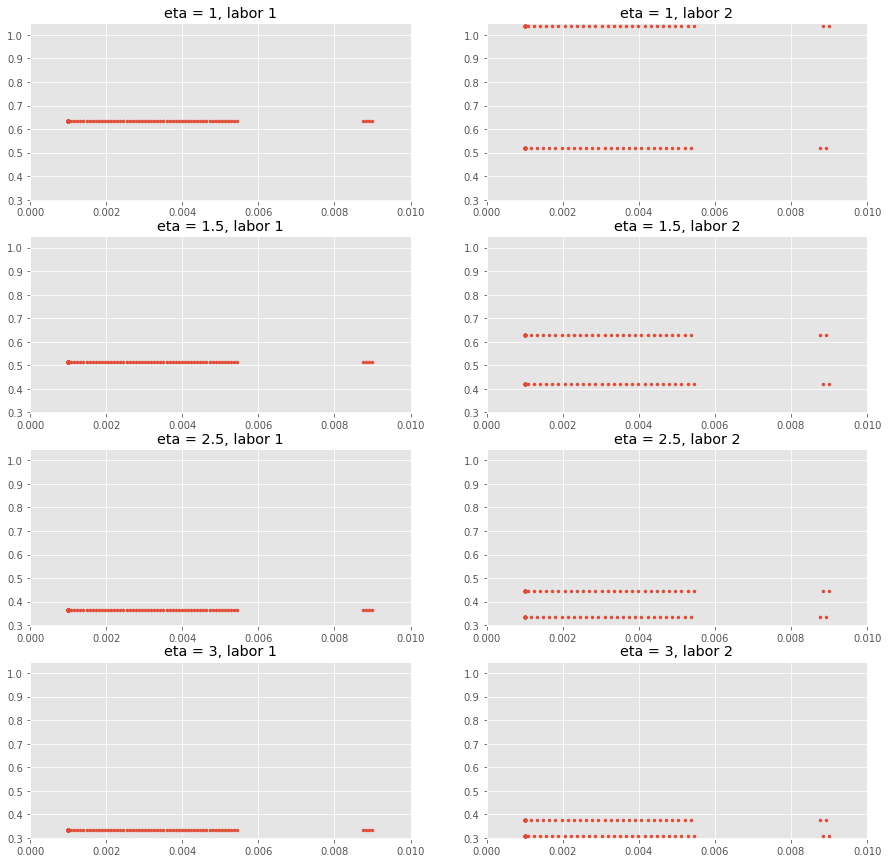

In [21]:
def plot2AFig3():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1h = fig.add_subplot(4, 2, 1)
    eta1h.scatter(y[0:100], optiH1[0:100], marker='.')
    eta1h.set_title('eta = 1, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta1h2 = fig.add_subplot(4, 2, 2)
    eta1h2.scatter(y[0:100],optiH2[0:100], marker='.')
    eta1h2.set_title('eta = 1, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta15h= fig.add_subplot(4, 2, 3)
    eta15h.scatter(y[100:200], optiH1[100:200], marker='.')
    eta15h.set_title('eta = 1.5, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta15h2= fig.add_subplot(4, 2, 4)
    eta15h2.scatter(y[100:200], optiH2[100:200], marker='.')
    eta15h2.set_title('eta = 1.5, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    
    eta25h = fig.add_subplot(4, 2, 5)
    eta25h.scatter(y[200:300], optiH1[200:300], marker='.')
    eta25h.set_title('eta = 2.5, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta25h2 = fig.add_subplot(4, 2, 6)
    eta25h2.scatter(y[200:300],optiH2[200:300], marker='.')
    eta25h2.set_title('eta = 2.5, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta3h= fig.add_subplot(4, 2, 7)
    eta3h.scatter(y[300:400], optiH1[300:400], marker='.')
    eta3h.set_title('eta = 3, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    eta3h2= fig.add_subplot(4, 2, 8)
    eta3h2.scatter(y[300:400], optiH2[300:400], marker='.')
    eta3h2.set_title('eta = 3, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([minH, maxH])
    
plot2AFig3()

## Figure 6

In [26]:

def KapMarkClear(r, t, T1, T2): 
    y = [0]*400
    #Supp = [0]*400
    #Dem = [0]*400
    Res = []
    for i in range(400):
        y[i] = P[i][1]
        Res.append(itemgetter(*[16,17])(uMax(P[i][0], P[i][1], P[i][2], t, T1, T2, r)))
        #Dem[i] = uMax(P[i][0], P[i][1], P[i][2], t, T1, T2, r)[7]


        
    Agg = np.sum(Res, axis=0).tolist()
    Agg_dem = Agg[0]
    Agg_supp = Agg[1]
    Agg_excess = Agg_supp + Agg_dem
    
    isClear = False
    if abs(Agg_excess)<0.25: isClear = True
    
    return(r, Agg, Agg_dem, Agg_supp, Agg_excess, isClear)#, Agg_dem, Agg_excess, isClear)

In [27]:
def FindInterestRate(t, T1, T2):
    n = 10
    m= 40
    r=np.linspace(-0.04, 0.04, n)
    data = []
    min_exess = 100000
    Demand = [0]*n
    Supply = [0]*n
    Excess = [0]*n
    r_min = 10000
    excess_min = 1000000
    
    for i in range(n):
        data.append(KapMarkClear(r[i],t,T1,T1))    
        Demand[i] = data[i][2]
        if Demand[i]==0 and Demand[i-1]<0: r_upp = r[i-1]
        Supply[i] = data[i][3]
        if Supply[i]==0: r_low = r[i]
        
        
    #zooming the interval
    r=np.linspace(r_low, r_upp, m)
    dataFindIR = []
    min_exess = 100000
    Demand = [0]*m
    Supply = [0]*m
    Excess = [0]*m
    r_min = 10000
    excess_min = 1000000
    r_opt = 10000
    Agg_excess = np.zeros(m)
    
    
    for i in range(m):
        dataFindIR.append(KapMarkClear(r[i],t,T1,T1))  
        r[i] = dataFindIR[-1][0]
        Agg_excess[i] =dataFindIR[-1][4]
        #isClear[i] = dataFindIR[-1][5]
        if abs(Agg_excess[i])<abs(excess_min): 
            excess_min = Agg_excess[i]
            r_opt = r[i]
        
                      
    return(r_min, dataFindIR, excess_min, r_opt)


In [54]:
data_test = FindInterestRate(0, 0, 0)[1]

In [55]:
r = np.zeros(len(data_test))
supply = np.zeros(len(data_test))
demand = np.zeros(len(data_test))
for i in range(len(data_test)):
    r[i] = data_test[i][0]
    supply[i] = data_test[i][3]
    demand[i] = data_test[i][2]

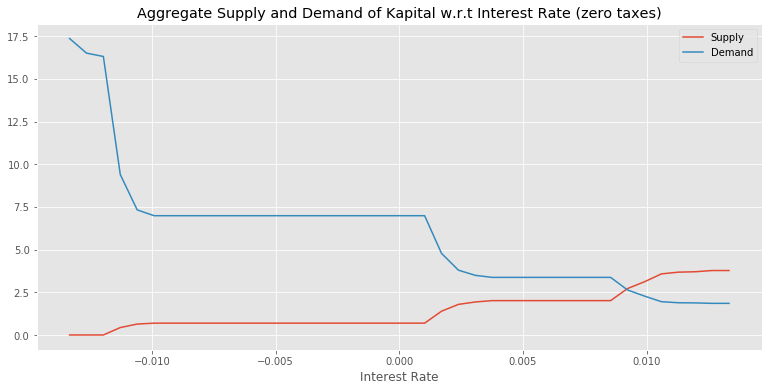

In [57]:
def plot2AFig6():
    plt.plot(r, supply, label='Supply')
    plt.plot(r, -demand, label='Demand')
    plt.title('Aggregate Supply and Demand of Kapital w.r.t Interest Rate (zero taxes)')
    plt.rcParams["figure.figsize"] = (13,6)
    plt.xlabel('Interest Rate')
    plt.legend()
    
plot2AFig6()

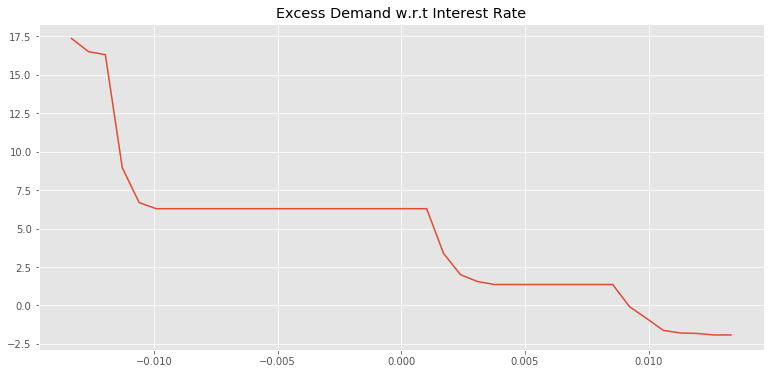

In [149]:
def plot2AFig62():
    plt.plot(r, -demand-supply)
    plt.title('Excess Demand w.r.t Interest Rate')
    plt.rcParams["figure.figsize"] = (13,6)
    
plot2AFig62()

## Figure 7


In [152]:
y = [0]*400
LT= [0]*400

for i in range(400):
    y[i] = P[i][1]
    LT[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.05)[11]

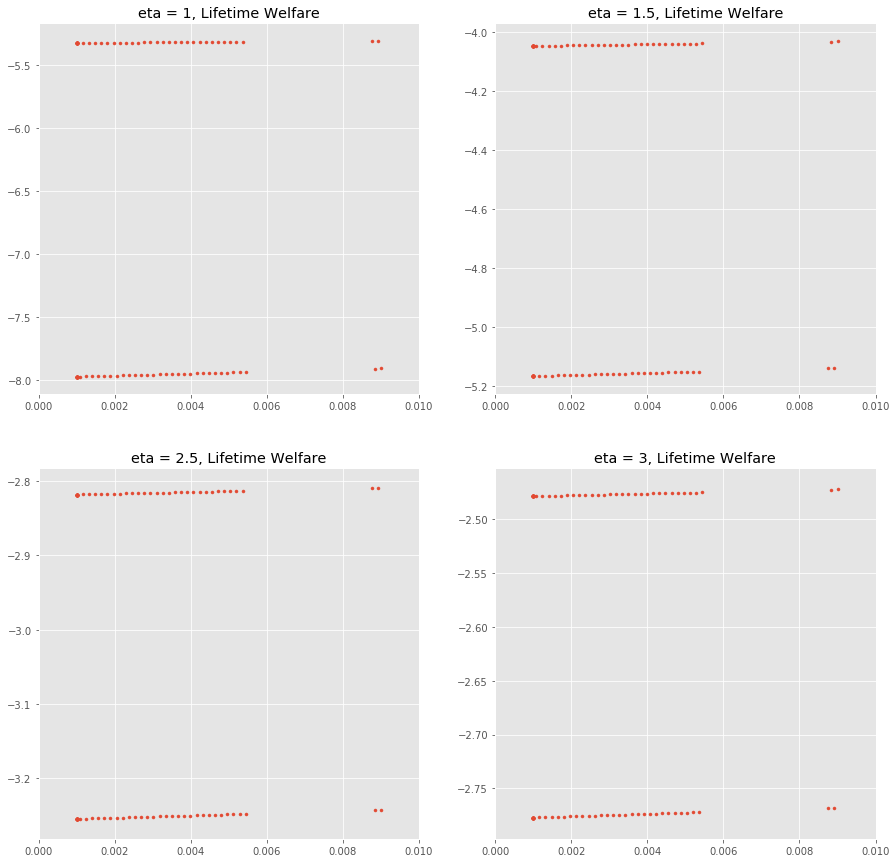

In [154]:
def plot2AFig7():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1ass = fig.add_subplot(2, 2, 1)
    eta1ass.scatter(y[0:100], LT[0:100], marker='.')
    eta1ass.set_title('eta = 1, Lifetime Welfare')
    plt.xlim([0,0.01])
    eta1cons1 = fig.add_subplot(2, 2, 2)
    eta1cons1.scatter(y[100:200],LT[100:200], marker='.')
    eta1cons1.set_title('eta = 1.5, Lifetime Welfare')
     plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(2, 2, 3)
    eta1cons2.scatter(y[200:300], LT[200:300], marker='.')
    eta1cons2.set_title('eta = 2.5, Lifetime Welfare')
    plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(2, 2, 4)
    eta1cons2.scatter(y[300:400], LT[300:400], marker='.')
    eta1cons2.set_title('eta = 3, Lifetime Welfare')
    plt.xlim([0,0.01])

plot2AFig7()

# b) 

In [287]:
#government budget must be balanced:
def findT(r, t):
    T1 = [0.0005]
    T2 = [0.0005]
    Total_tax_revenue_1 = [0, 0]
    Total_tax_revenue_2 = [0, 0]
    
    while (abs(T1[-1]-Total_tax_revenue_1[-2]/400)>0.0001 and abs(T2[-1]-Total_tax_revenue_2[-2]/400)>0.0001):
        Summing1=0
        Summing2=0
        
        for i in range(400):
            Temp = uMax(P[i][0], P[i][1], P[i][2], t, T1[-1], T2[-1], r)
            Summing1 = Summing1+Temp[12]
            Summing2 = Summing2+Temp[13]
            
        Total_tax_revenue_1.append(Summing1)
        Total_tax_revenue_2.append(Summing2)
        T1.append(Total_tax_revenue_1[-1]/400)
        T2.append(Total_tax_revenue_2[-1]/400)
#        print(t, T1[-1], T2[-1])#, Total_tax_revenue_1[-2]/400, Total_tax_revenue_2[-2]/400)
    return(T1[-1], T2[-1])


In [290]:
temp = findT(0.00923, 0.115)

In [304]:
def findTandR(t):
    r = 0
    
    for i in range(4):
        temp = findT(r,t)
        print(temp)

        T1_temp = temp[0]
        T2_temp = temp[1]

        r = FindInterestRate(t, T1_temp, T2_temp)[3]
        print(r)
    
    
    
    return(r,T1_temp,T2_temp)

In [305]:
rTT = findTandR(0.115)

(0.09322168623737355, 0.09479457870416659)
0.022222222222222223
(0.09539970928030275, 0.09255076912240243)
0.02017094017094017
(0.09539970928030275, 0.09146445157610071)
0.02017094017094017
(0.09539970928030275, 0.09146445157610071)
0.02017094017094017
(0.09539970928030275, 0.09146445157610071)
0.02017094017094017


(0.02017094017094017, 0.09539970928030275, 0.09146445157610071)

In [7]:
rTT = [0.02017094017094017, 0.09539970928030275, 0.09146445157610071]

## 2 b) Fig 1

In [312]:
by = [0]*400
bassets = [0]*400
bconsum1 = [0]*400
bconsum2 = [0]*400
bLT= [0]*400

for i in range(400):
    by[i] = P[i][1]
    Temp = uMax(P[i][0], P[i][1], P[i][2], 0.115, rTT[1], rTT[2], rTT[0])
    bassets[i] = Temp[14]
    bconsum1[i] = Temp[2]
    bconsum2[i] = Temp[6]
    bLT[i]= Temp[11]


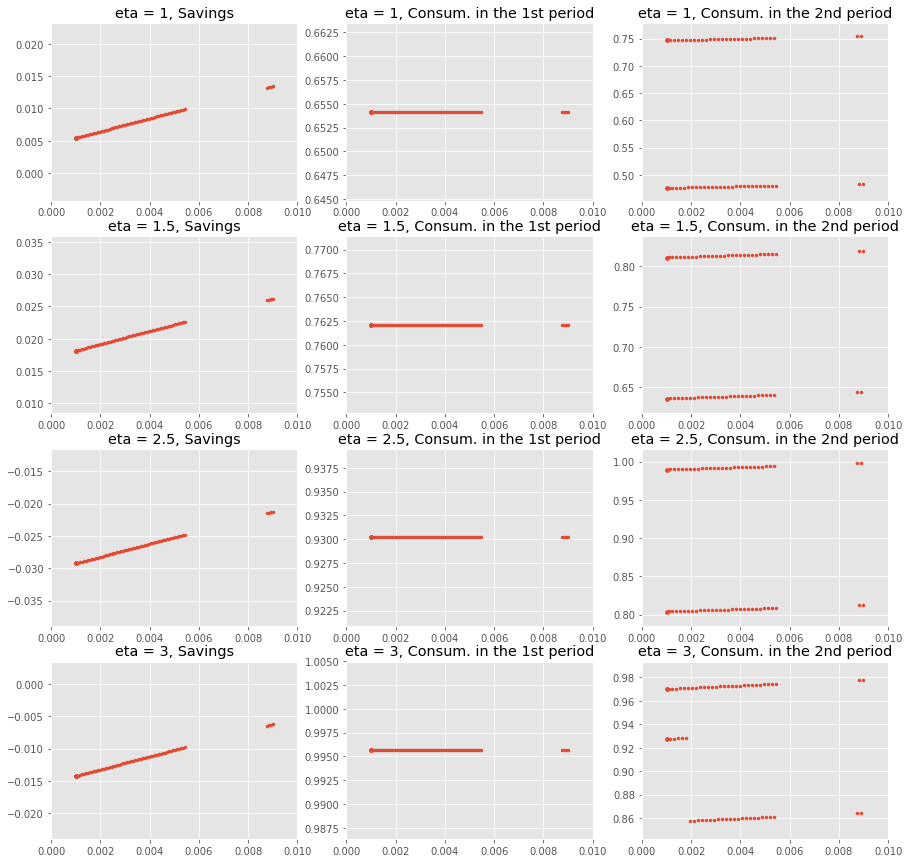

In [314]:
def plot2BFig1():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1ass = fig.add_subplot(4, 3, 1)
    eta1ass.scatter(by[0:100], bassets[0:100], marker='.')
    eta1ass.set_title('eta = 1, Savings')
    plt.xlim([0,0.01])
    eta1cons1 = fig.add_subplot(4, 3, 2)
    eta1cons1.scatter(by[0:100],bconsum1[0:100], marker='.')
    eta1cons1.set_title('eta = 1, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(4, 3, 3)
    eta1cons2.scatter(by[0:100], bconsum2[0:100], marker='.')
    eta1cons2.set_title('eta = 1, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta15ass = fig.add_subplot(4, 3, 4)
    eta15ass.scatter(by[100:200], bassets[100:200], marker='.')
    eta15ass.set_title('eta = 1.5, Savings')
    plt.xlim([0,0.01])
    eta15cons1 = fig.add_subplot(4, 3, 5)
    eta15cons1.scatter(by[100:200],bconsum1[100:200], marker='.')
    eta15cons1.set_title('eta = 1.5, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta15cons2= fig.add_subplot(4, 3, 6)
    eta15cons2.scatter(by[100:200], bconsum2[100:200], marker='.')
    eta15cons2.set_title('eta = 1.5, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta25ass = fig.add_subplot(4, 3, 7)
    eta25ass.scatter(by[200:300], bassets[200:300], marker='.')
    eta25ass.set_title('eta = 2.5, Savings')
    plt.xlim([0,0.01])
    eta25cons1 = fig.add_subplot(4, 3, 8)
    eta25cons1.scatter(by[200:300],bconsum1[200:300], marker='.')
    eta25cons1.set_title('eta = 2.5, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta25cons2= fig.add_subplot(4, 3, 9)
    eta25cons2.scatter(by[200:300], bconsum2[200:300], marker='.')
    eta25cons2.set_title('eta = 2.5, Consum. in the 2nd period')
    plt.xlim([0,0.01])
    
    eta3ass = fig.add_subplot(4, 3, 10)
    eta3ass.scatter(by[300:400], bassets[300:400], marker='.')
    eta3ass.set_title('eta = 3, Savings')
    plt.xlim([0,0.01])
    eta3cons1 = fig.add_subplot(4, 3, 11)
    eta3cons1.scatter(by[300:400],bconsum1[300:400], marker='.')
    eta3cons1.set_title('eta = 3, Consum. in the 1st period')
    plt.xlim([0,0.01])
    eta3cons2= fig.add_subplot(4, 3, 12)
    eta3cons2.scatter(by[300:400], bconsum2[300:400], marker='.')
    eta3cons2.set_title('eta = 3, Consum. in the 2nd period')
    plt.xlim([0,0.01])

plot2BFig1()

## 2 b) Fig 7 

In [8]:
by = [0]*400
bLT= [0]*400

for i in range(400):
    by[i] = P[i][1]
    bLT[i] = uMax(P[i][0], P[i][1], P[i][2], 0.115, rTT[1], rTT[2], rTT[0])[11]

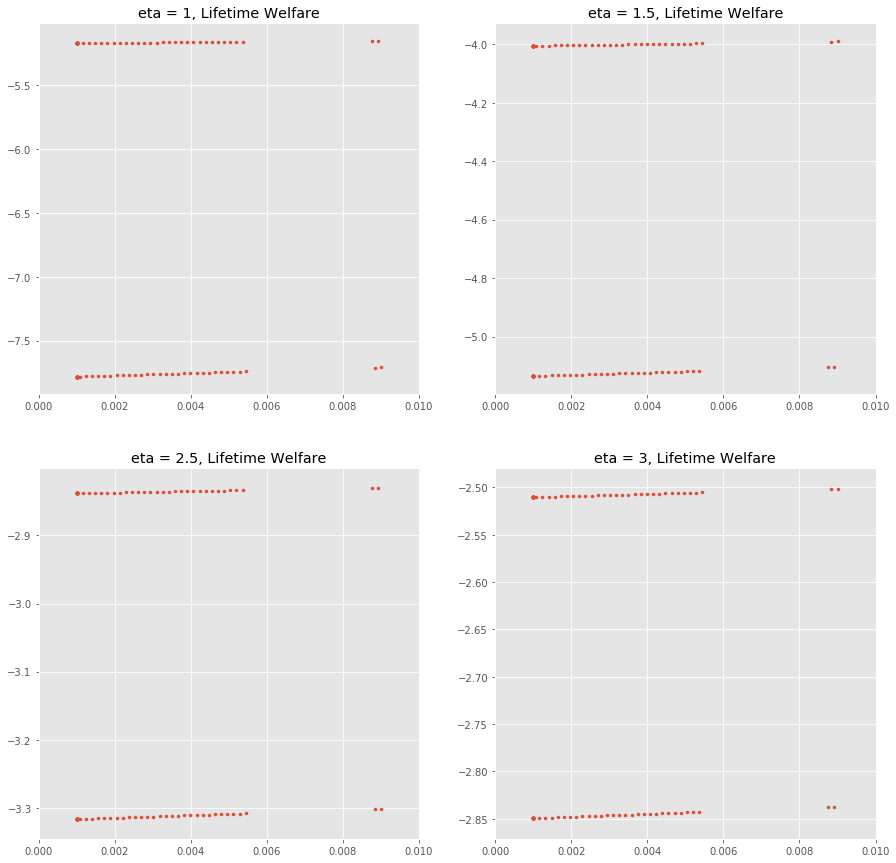

In [11]:
def plot2AFig7():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1ass = fig.add_subplot(2, 2, 1)
    eta1ass.scatter(by[0:100], bLT[0:100], marker='.')
    eta1ass.set_title('eta = 1, Lifetime Welfare')
    plt.xlim([0,0.01])
    eta1cons1 = fig.add_subplot(2, 2, 2)
    eta1cons1.scatter(by[100:200],bLT[100:200], marker='.')
    eta1cons1.set_title('eta = 1.5, Lifetime Welfare')
    plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(2, 2, 3)
    eta1cons2.scatter(by[200:300], bLT[200:300], marker='.')
    eta1cons2.set_title('eta = 2.5, Lifetime Welfare')
    plt.xlim([0,0.01])
    eta1cons2= fig.add_subplot(2, 2, 4)
    eta1cons2.scatter(by[300:400], bLT[300:400], marker='.')
    eta1cons2.set_title('eta = 3, Lifetime Welfare')
    plt.xlim([0,0.01])

plot2AFig7()

## 2 b) Fig 2

In [12]:
by = [0]*400
bsaveRate = [0]*400

for i in range(400):
    by[i] = P[i][1]
    bsaveRate[i] = uMax(P[i][0], P[i][1], P[i][2], 0.115, rTT[1], rTT[2], rTT[0])[15]
    
bminSave = min(bsaveRate) - 0.01
bmaxSave = max(bsaveRate) + 0.01

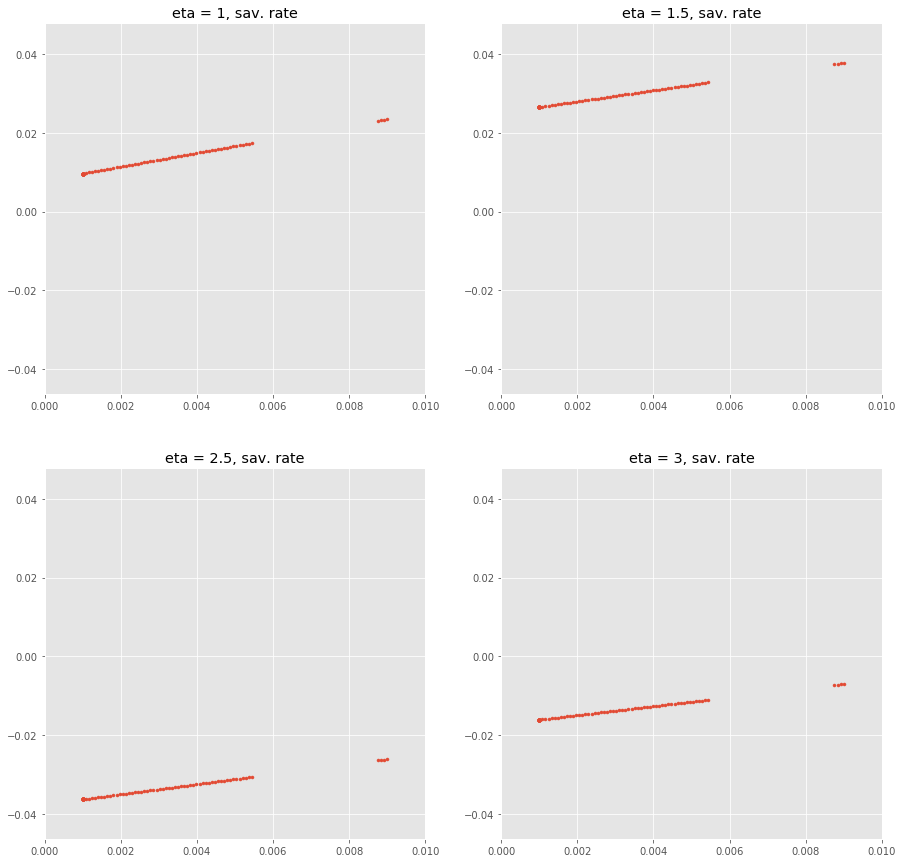

In [13]:
def plot2BFig2():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1 = fig.add_subplot(2, 2, 1)
    eta1.scatter(by[0:100], bsaveRate[0:100], marker='.')
    eta1.set_title('eta = 1, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([bminSave, bmaxSave])
    eta15 = fig.add_subplot(2, 2, 2)
    eta15.scatter(by[100:200],bsaveRate[100:200], marker='.')
    eta15.set_title('eta = 1.5, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([bminSave, bmaxSave])
    eta25= fig.add_subplot(2, 2, 3)
    eta25.scatter(by[200:300], bsaveRate[200:300], marker='.')
    eta25.set_title('eta = 2.5, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([bminSave, bmaxSave])
    eta3= fig.add_subplot(2, 2, 4)
    eta3.scatter(by[300:400], bsaveRate[300:400], marker='.')
    eta3.set_title('eta = 3, sav. rate')
    plt.xlim([0,0.01])
    plt.ylim([bminSave, bmaxSave])
    
plot2BFig2()

## 2 b) Fig 3

In [18]:
by = [0]*400
boptiH1 = [0]*400
boptiH2 = [0]*400

for i in range(400):
    by[i] = P[i][1]
    boptiH1[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[3]
    boptiH2[i] = uMax(P[i][0], P[i][1], P[i][2], 0, 0, 0, 0.005)[7]
    
bminH = min(min(boptiH1),min(boptiH2)) - 0.1
bmaxH = max(max(boptiH1), max(boptiH2)) + 0.1

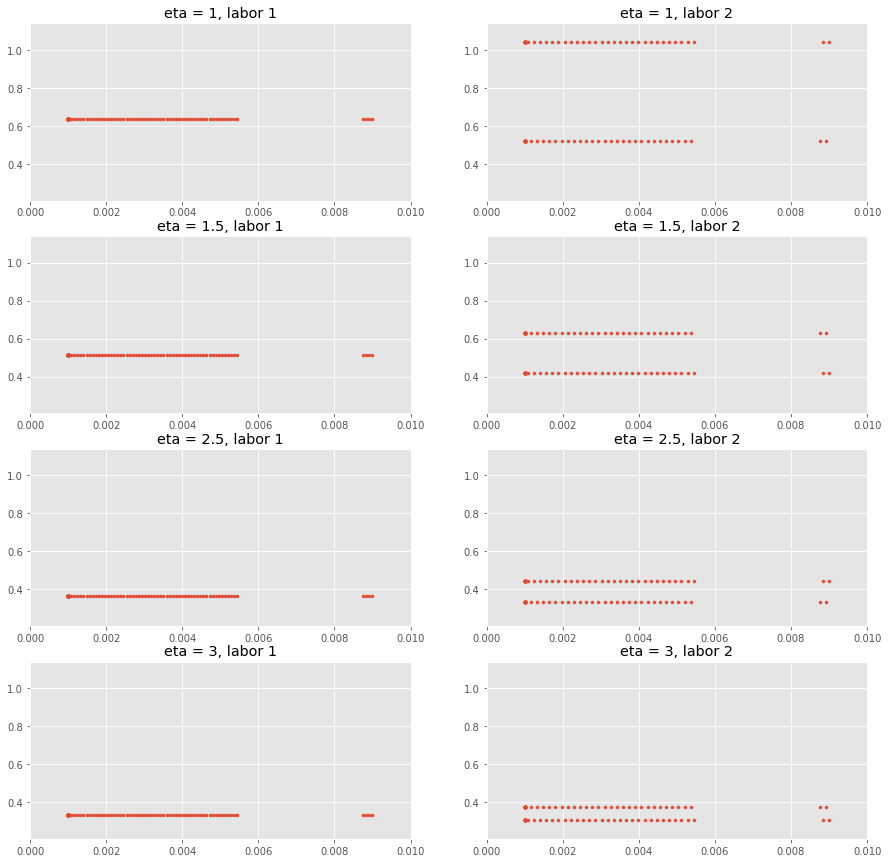

In [19]:
def plot2BFig3():
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    eta1h = fig.add_subplot(4, 2, 1)
    eta1h.scatter(by[0:100], boptiH1[0:100], marker='.')
    eta1h.set_title('eta = 1, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta1h2 = fig.add_subplot(4, 2, 2)
    eta1h2.scatter(by[0:100],boptiH2[0:100], marker='.')
    eta1h2.set_title('eta = 1, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta15h= fig.add_subplot(4, 2, 3)
    eta15h.scatter(by[100:200], boptiH1[100:200], marker='.')
    eta15h.set_title('eta = 1.5, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta15h2= fig.add_subplot(4, 2, 4)
    eta15h2.scatter(by[100:200], boptiH2[100:200], marker='.')
    eta15h2.set_title('eta = 1.5, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    
    eta25h = fig.add_subplot(4, 2, 5)
    eta25h.scatter(by[200:300], boptiH1[200:300], marker='.')
    eta25h.set_title('eta = 2.5, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta25h2 = fig.add_subplot(4, 2, 6)
    eta25h2.scatter(by[200:300],boptiH2[200:300], marker='.')
    eta25h2.set_title('eta = 2.5, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta3h= fig.add_subplot(4, 2, 7)
    eta3h.scatter(by[300:400], boptiH1[300:400], marker='.')
    eta3h.set_title('eta = 3, labor 1')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    eta3h2= fig.add_subplot(4, 2, 8)
    eta3h2.scatter(by[300:400], boptiH2[300:400], marker='.')
    eta3h2.set_title('eta = 3, labor 2')
    plt.xlim([0,0.01])
    plt.ylim([bminH, bmaxH])
    
plot2BFig3()

## 2 b) Fig 6

In [33]:
DATA = FindInterestRate(0.115, rTT[1], rTT[2])[1]

In [34]:
len(DATA)

40

In [36]:
r = np.zeros(len(DATA))
supply = np.zeros(len(DATA))
demand = np.zeros(len(DATA))
for i in range(len(DATA)):
    r[i] = DATA[i][0]
    supply[i] = DATA[i][3]
    demand[i] = DATA[i][2]

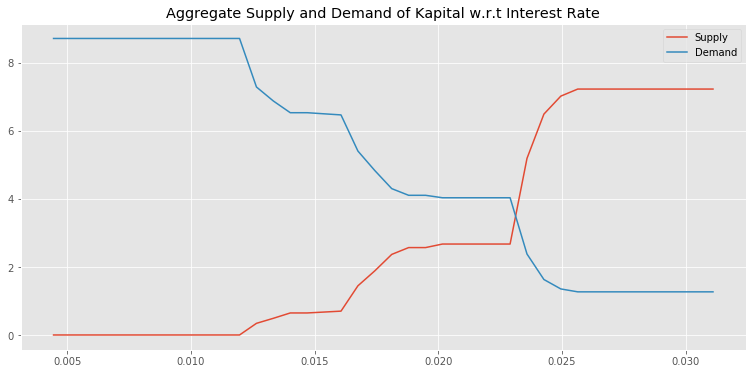

In [39]:
def plot2bFig6():
    plt.plot(r, supply, label='Supply')
    plt.plot(r, -demand, label='Demand')
    plt.title('Aggregate Supply and Demand of Kapital w.r.t Interest Rate (tax = 11.5%)')
    plt.rcParams["figure.figsize"] = (13,6)
    plt.legend()
    
plot2bFig6()

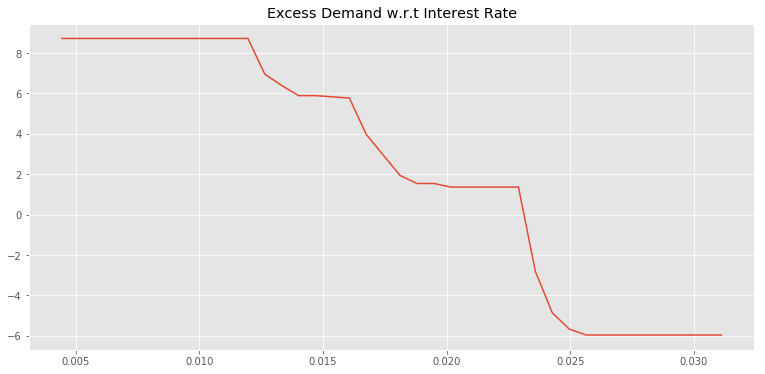

In [40]:
def plot2bFig62():
    plt.plot(r, -demand-supply)
    plt.title('Excess Demand w.r.t Interest Rate')
    plt.rcParams["figure.figsize"] = (13,6)
    
plot2bFig62()

## 2 b Fig 7